In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import random
import math
import time
from mpl_toolkits.mplot3d import Axes3D
import os
from ipywidgets import IntProgress
from IPython.display import display

In [2]:
def randomangle_Cone(alpha):
    theta = math.pi/2 -np.arccos(random.random()*np.cos(math.pi/2-alpha/2))
    phi   = random.random()*2*math.pi
    A = np.sqrt(1+np.tan(phi)**2)
    if math.pi/2 < phi <= 3*math.pi/2:
        ZX = - np.arctan(np.tan(theta)/A)
        ZY = - np.arctan(np.tan(theta)*np.tan(phi)/A)
    else:
        ZX = np.arctan(np.tan(theta)/A)
        ZY = np.arctan(np.tan(theta)*np.tan(phi)/A)
    return(ZX,ZY,theta,phi)

def position_uniform(lower_generator,upper_generator):
    #uniformly generated particles on the range [lower_generator,upper_generator]
    x,y = 20,20
    while x**2 + y**2 > 625:
        x,y = lower_generator + random.random()*(upper_generator-lower_generator),lower_generator + random.random()*(upper_generator-lower_generator)
    return x,y

def format_radians_label(float_in):
    # Converts a float value in radians into a
    # string representation of that float
    string_out = str(float_in / (np.pi))+"π"
    
    return string_out
def convert_polar_xticks_to_radians(ax):
    # Converts x-tick labels from degrees to radians
    
    # Get the x-tick positions (returns in radians)
    label_positions = ax.get_xticks()
    
    # Convert to a list since we want to change the type of the elements
    labels = list(label_positions)
    
    # Format each label (edit this function however you'd like)
    labels = [format_radians_label(label) for label in labels]
    
    ax.set_xticklabels(labels)

def sapphirescatter():
    prob = random.random()
    if prob >= 0.5:
        scatter = True
    else:
        scatter = False
    return scatter

def histogram (IndexX,IndexY,PosXX,PosYY,bonus,AnT,AnP,col_D,col_L):
    hist,xax,yax,image = plt.hist2d(PosXX,PosYY,bins=200,range=[[-30,30],[-30,30]])
    print(hist[0,1])
    plt.show()
    plt.close()
    plt.plot(hist[100])
    plt.show()
    plt.close()
    
    file_positions = open("Sapphire0.txt","a")
    for i in hist[100]:
        file_positions.write(str(i)+",")
    file_positions.close()
    
    #hist_resh = np.reshape(hist,[200,200])
    
    for j in range(bonus):
        for i in range(bonus):
            hist[IndexX+j,IndexY+i]=0
    fig1 = plt.figure(figsize=(14,10))
    mat = fig1.add_subplot(111)
    tax = mat.matshow(hist)
    plt.show()
    plt.close()

    indices_X = [idx for idx,val in enumerate(PosXX) if xax[IndexX]< val <= xax[IndexX+bonus]]
    indices_Y = [idx for idx,val in enumerate(PosYY) if yax[IndexY]< val <= yax[IndexY+bonus]]
    set_IndicesX = set(indices_X)
    set_IndicesY = set(indices_Y)
    common = []
    if set_IndicesX & set_IndicesY:
        common = set_IndicesX & set_IndicesY
    Distribution_theta = np.zeros(len(common))
    Distribution_phi = np.zeros(len(common))
    i = 0
    for elem in common:
        Distribution_theta[i] = AnT[elem]
        Distribution_phi[i] = AnP[elem]
        i+=1
    fig , (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
    fig.set_figheight(5)
    fig.set_figwidth(30)
    ax1.hist(Distribution_theta,20)
    ax1.set_title("Theta distribution (rad) selected area")
    ax1.set_xlabel("Rad")
    ax1.set_ylabel("Counts")
    ax2.hist(Distribution_phi,20)
    ax2.set_title("Phi distribution (rad) selected area")
    ax2.set_xlabel("Rad")
    ax2.set_ylabel("Counts")
    ax3.hist(AnT,200)
    ax3.set_title("Theta distribution (rad) total")
    ax3.set_xlabel("Rad")
    ax3.set_ylabel("Counts")
    ax4.hist(AnP,200)
    ax4.set_title("Phi distribution (rad) total")
    ax4.set_xlabel("Rad")
    ax4.set_ylabel("Counts")
    plt.show()
    plt.close()
    values,bins,patches = plt.hist(Distribution_phi,60)
    plt.show()
    plt.close()
    fig2 = plt.figure()
    fig2.set_figheight(7)
    fig2.set_figwidth(25)
    ay1 = plt.subplot(1,3,2)
    ay1.hist(Distribution_phi,40,range=[0,6.29])
    ay1.set_title("Phi distribution (rad) selected")
    ay1.set_xlabel("Rad")
    ay1.set_ylabel("Counts")
    ay2 = plt.subplot(1,3,1)
    ay2.hist(Distribution_theta,bins=60,range=[0,0.02])
    ay2.set_title("Theta distribution (rad) selected")
    ay2.set_xlabel("Rad")
    ay2.set_ylabel("Counts")
    ay3 = plt.subplot(133,projection="polar")
    ay3.bar(bins[:60],values,width=0.2,bottom=0.0,align="center")
    ay3.set_ylim([0,np.max(values)+1])
    ay3.set_theta_offset(3*math.pi/2)
    convert_polar_xticks_to_radians(ax3)
    plt.show()
    plt.close()
    print("Maximum expected L/D factor: ",col_L/col_D)
    print("Maximum expected angle: ",np.arctan(col_D/col_L))
    print("Distribution theta max: ",np.max(Distribution_theta))
    print("Measured L/D factor: ",1/np.arctan(np.max(Distribution_theta)))
    print("Distribution phi average: ",np.average(Distribution_phi))
    print("Total theta max: ",np.max(AnT))
    print("Total measured L/D factor: ",1/np.arctan(np.max(AnT)))
    print("Total phi average: ",np.average(AnP))

IntProgress(value=0)

Done, number of scattered: 9109540 Percentage: 0.5000015368551026


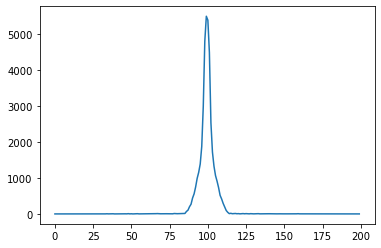

Data Saved


In [3]:
dist_to_saph = 1750
col_length = 2000
dist_to_det = 2000
LD = 15
lower_generator,upper_generator = -25,25
iterations = 50000000
alpha = np.arctan(1/LD)
scatteralpha = np.arctan(2)
AnT,AnP,PosXX,PosYY = [],[],[],[]
f = IntProgress(min=0,max=100)
display(f)
scatter_number = 0
neutronin = 0
for it in range(iterations):
    if it%(iterations/100) == 0:
        f.value= int(100*it/iterations)+1
    scatter = False
    neutron_position_X,neutron_position_Y = position_uniform(lower_generator,upper_generator)
    neutron_angle_X,neutron_angle_Y,theta,phi = randomangle_Cone(alpha)

    LD_neutron_X = np.tan(neutron_angle_X)
    LD_neutron_Y = np.tan(neutron_angle_Y)
    
    fz_X = dist_to_saph * LD_neutron_X + neutron_position_X
    fz_Y = dist_to_saph * LD_neutron_Y + neutron_position_Y
    if fz_X**2 + fz_Y**2 < 625:
        neutronin+=1
        scatter = sapphirescatter()
        #scatter = False
        if scatter == True: 
            neutron_angle_X,neutron_angle_Y,theta,phi = randomangle_Cone(scatteralpha)
            scatter_number+=1
            LD_neutron_X = np.tan(neutron_angle_X)
            LD_neutron_Y = np.tan(neutron_angle_Y)
        fd_X = (col_length - dist_to_saph)*LD_neutron_X + fz_X
        fd_Y = (col_length - dist_to_saph)*LD_neutron_Y + fz_Y
        if fd_X**2 + fd_Y**2 < 25:
            AnT.append(theta)
            AnP.append(phi)
            PosXX.append(dist_to_det*LD_neutron_X+fd_X)
            PosYY.append(dist_to_det*LD_neutron_Y+fd_Y)
print("Done, number of scattered: "+str(scatter_number)+" Percentage: "+str(scatter_number/neutronin))
hist,xax,yax,image = plt.hist2d(PosXX,PosYY,bins=200)
plt.close()
file_positions = open("SapphireTest0.txt","a")
for i in hist[100]:
    file_positions.write(str(i)+",")
file_positions.close()
plt.plot(hist[100])
plt.show()
plt.close()
print("Data Saved")

0.0


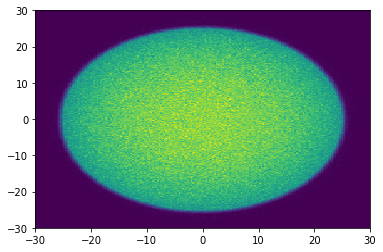

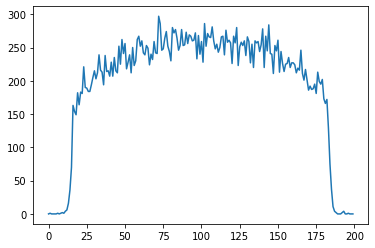

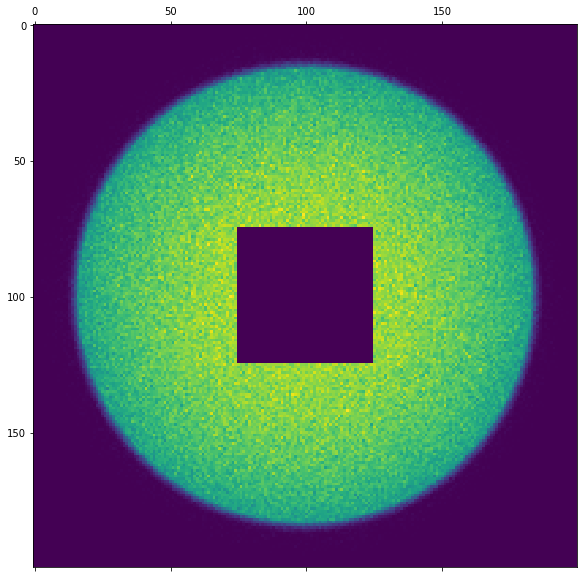

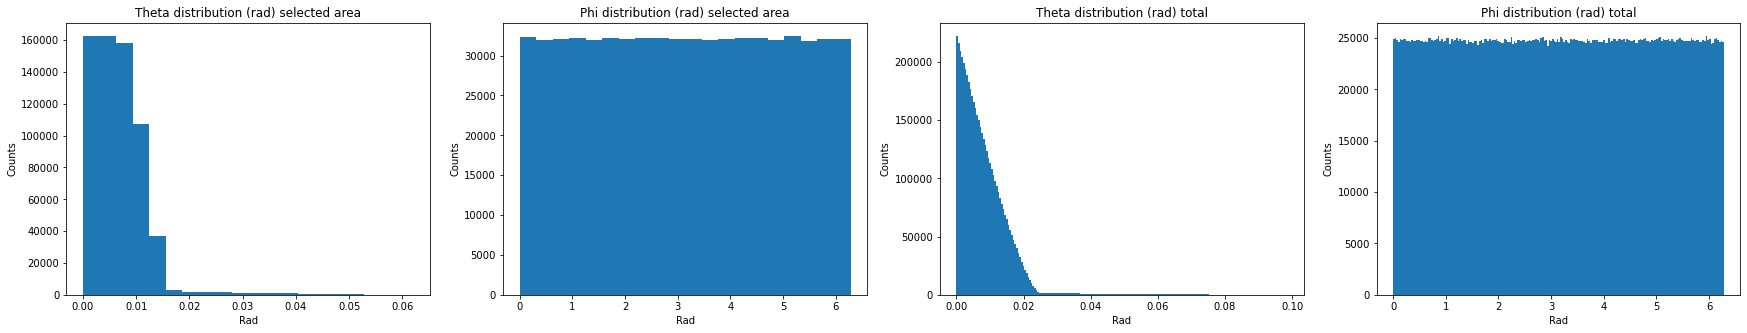

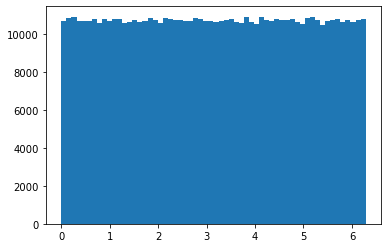

<ipython-input-28-90a82e2b09bb>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


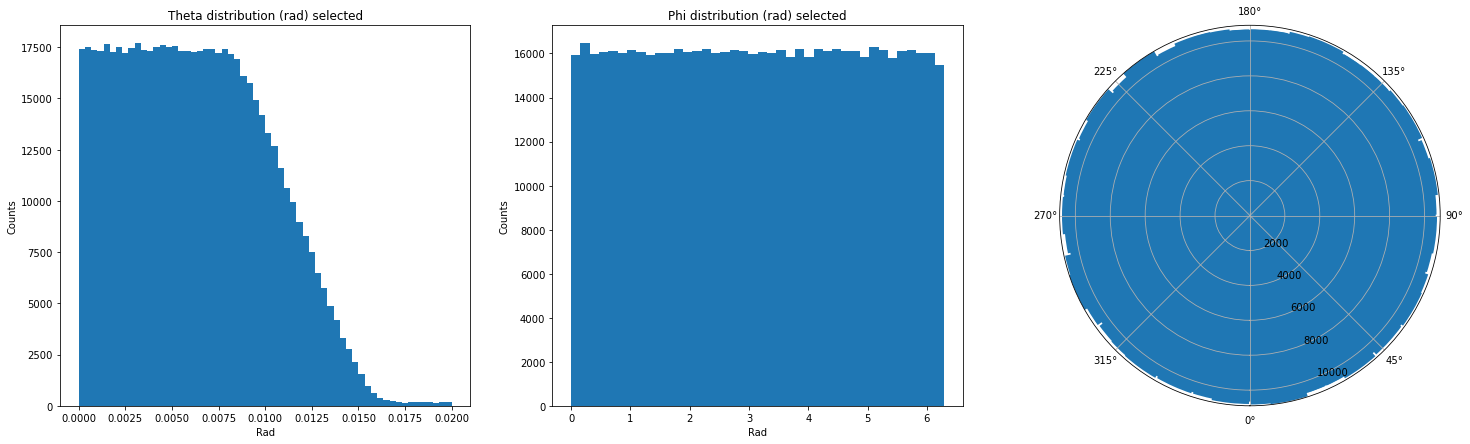

Maximum expected L/D factor:  40.0
Maximum expected angle:  0.02499479361892016
Distribution theta max:  0.06213559480992137
Measured L/D factor:  16.1145254149956
Distribution phi average:  3.1408915536308166
Total theta max:  0.0985241637944454
Total measured L/D factor:  10.182551146010653
Total phi average:  3.141752712965694


In [30]:
IndexX,IndexY = 75,75
bonus = 50
col_D = 50
col_L = col_length
histogram(IndexX,IndexY,PosXX,PosYY,bonus,AnT,AnP,col_D,col_L)
# Scatter True 75%, Sapphire at L=1000mm

0.0


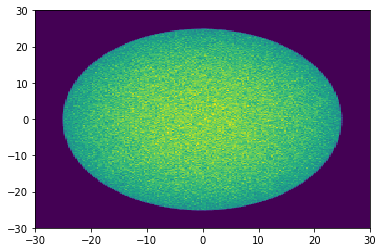

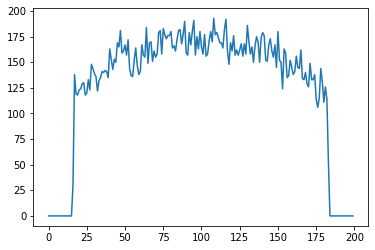

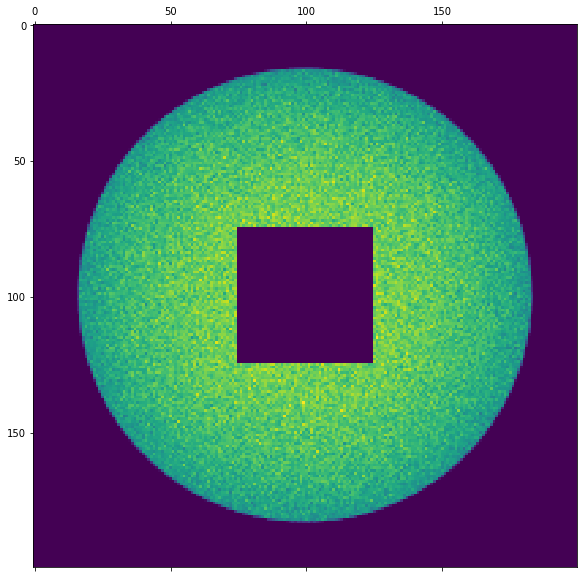

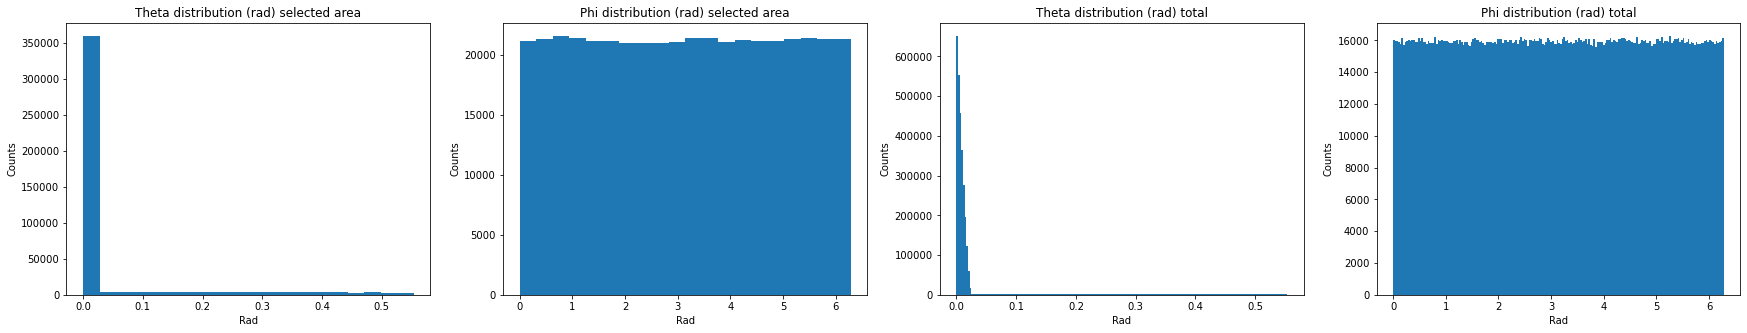

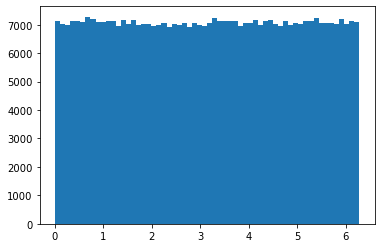

<ipython-input-56-45d189333f3f>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


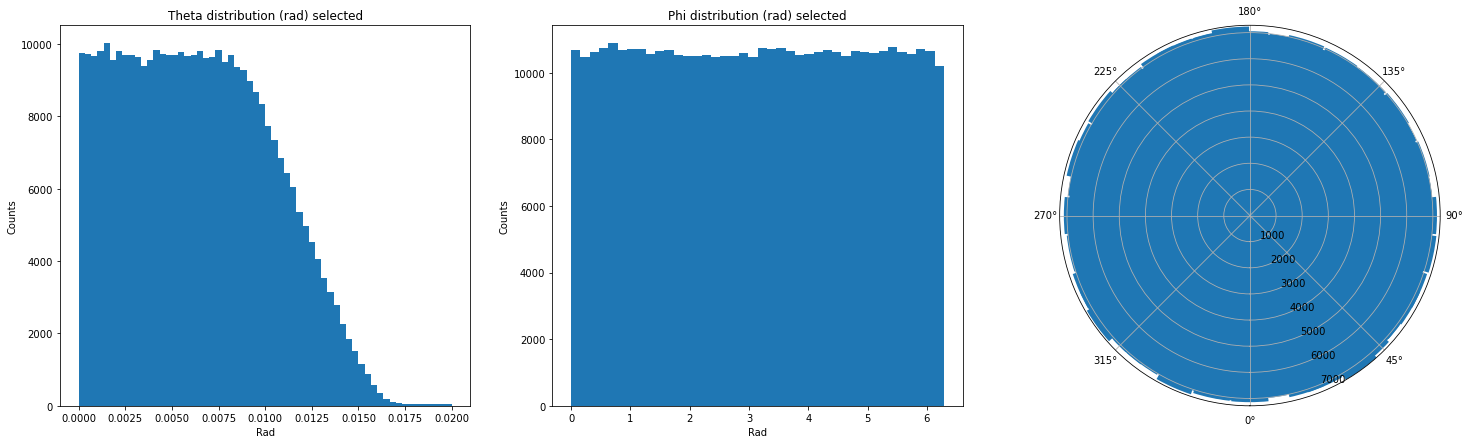

Maximum expected L/D factor:  40.0
Maximum expected angle:  0.02499479361892016
Distribution theta max:  0.5535495676135591
Measured L/D factor:  1.9779876812034958
Distribution phi average:  3.1418284867966606
Total theta max:  0.5535735531698847
Total measured L/D factor:  1.9779158530153045
Total phi average:  3.141510158322866


In [57]:
IndexX,IndexY = 75,75
bonus = 50
col_D = 50
col_L = col_length
histogram(IndexX,IndexY,PosXX,PosYY,bonus,AnT,AnP,col_D,col_L)
#Scatter True, L=1500mm

0.0


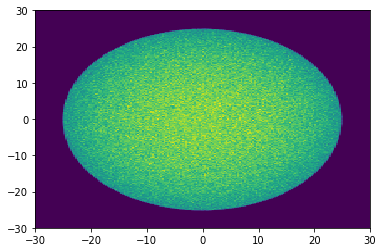

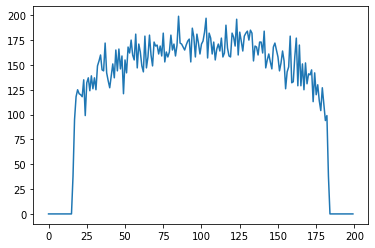

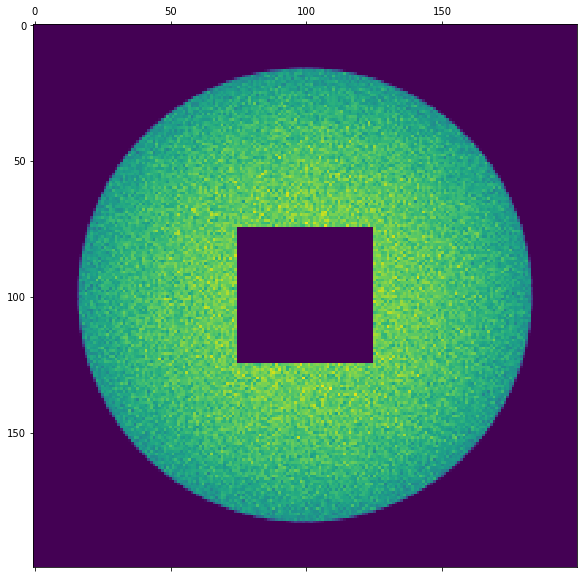

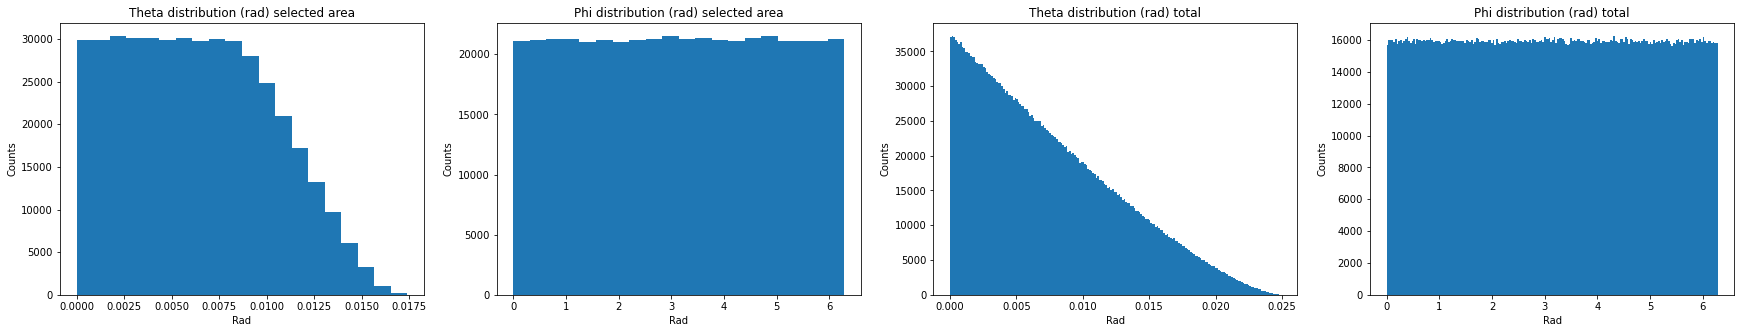

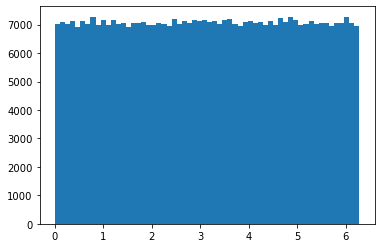

<ipython-input-45-5c0bf336dd70>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


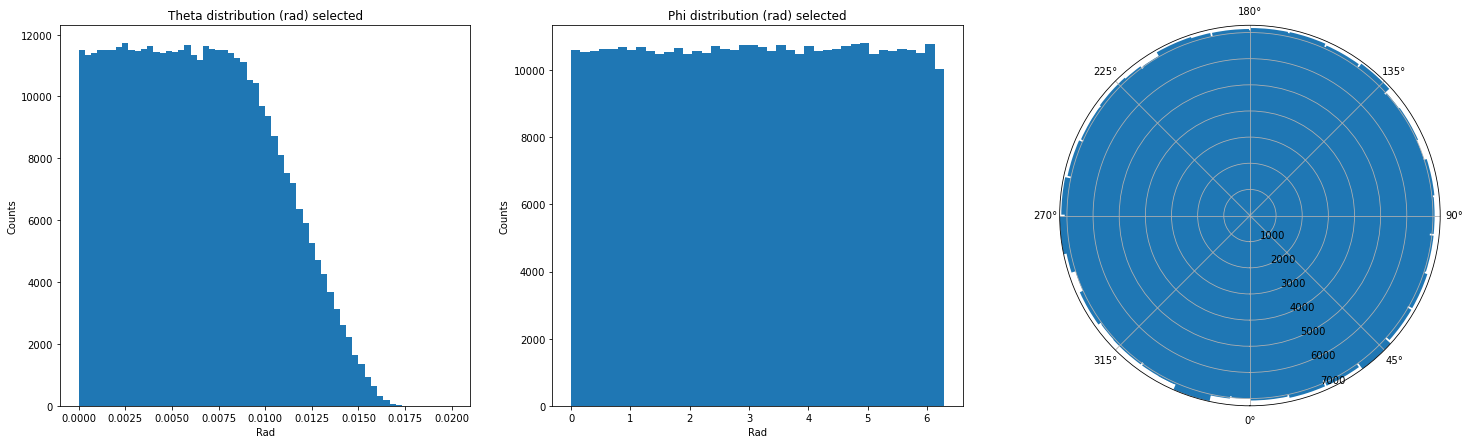

Maximum expected L/D factor:  40.0
Maximum expected angle:  0.02499479361892016
Distribution theta max:  0.017415917163358774
Measured L/D factor:  57.424543718617336
Distribution phi average:  3.143565990076154
Total theta max:  0.02491482765144659
Total measured L/D factor:  40.14504519014421
Total phi average:  3.140364120485817


In [51]:
IndexX,IndexY = 75,75
bonus = 50
col_D = 50
col_L = col_length
histogram(IndexX,IndexY,PosXX,PosYY,bonus,AnT,AnP,col_D,col_L)
# Scatter False, L=1000mm

0.0


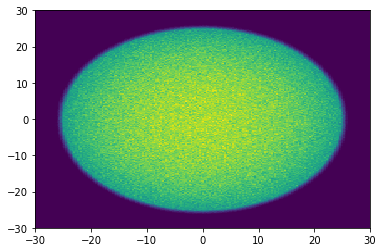

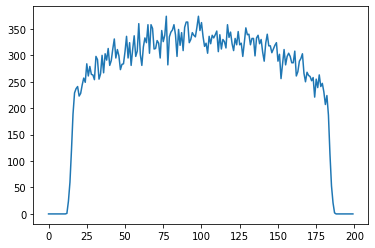

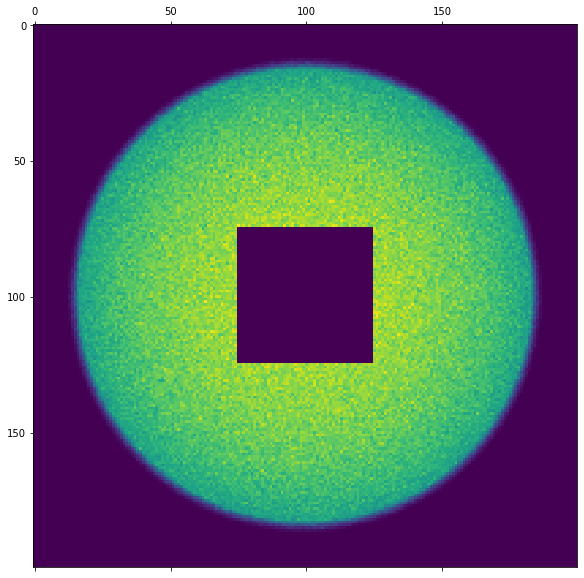

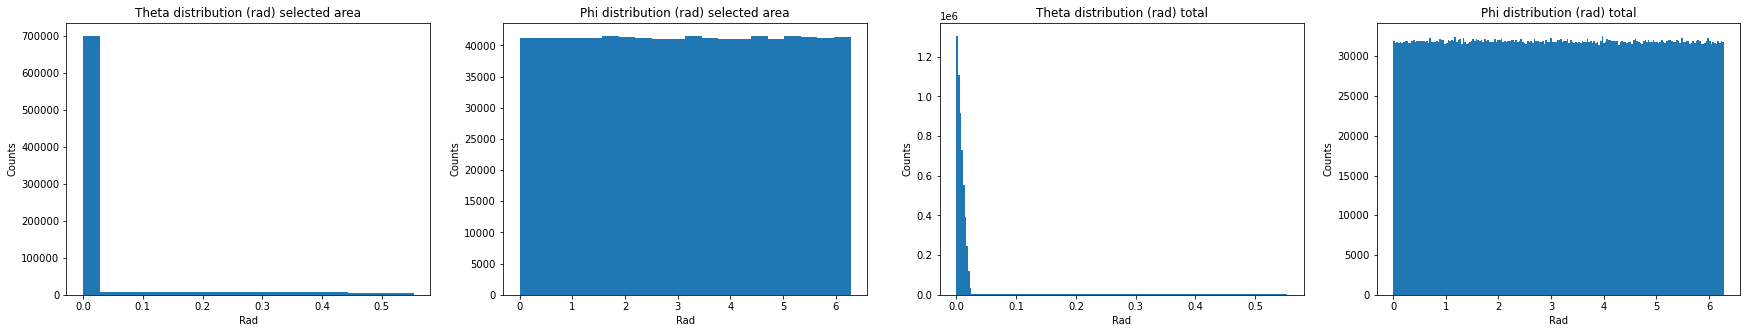

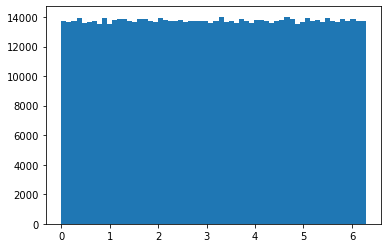

<ipython-input-75-30d304bc423c>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


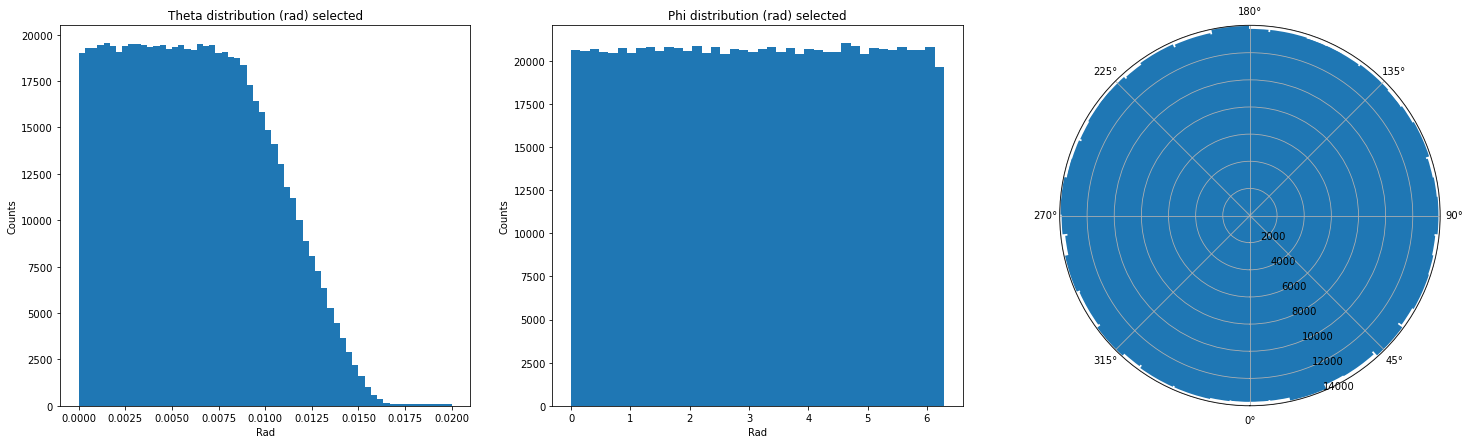

Maximum expected L/D factor:  40.0
Maximum expected angle:  0.02499479361892016
Distribution theta max:  0.5535707185406384
Measured L/D factor:  1.9779243413711949
Distribution phi average:  3.1431084721758773
Total theta max:  0.553574244277732
Total measured L/D factor:  1.977913783492704
Total phi average:  3.140191297660078


In [77]:
IndexX,IndexY = 75,75
bonus = 50
col_D = 50
col_L = col_length
histogram(IndexX,IndexY,PosXX,PosYY,bonus,AnT,AnP,col_D,col_L)
# Scatter True, L=1500mm, trans =84%

0.0


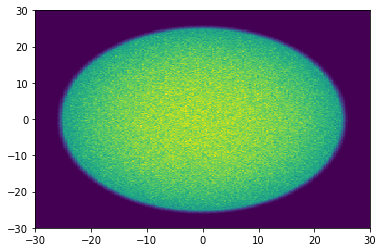

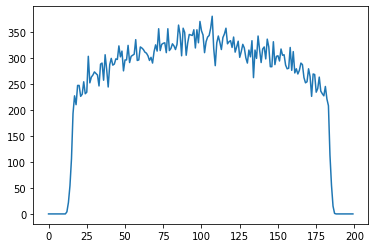

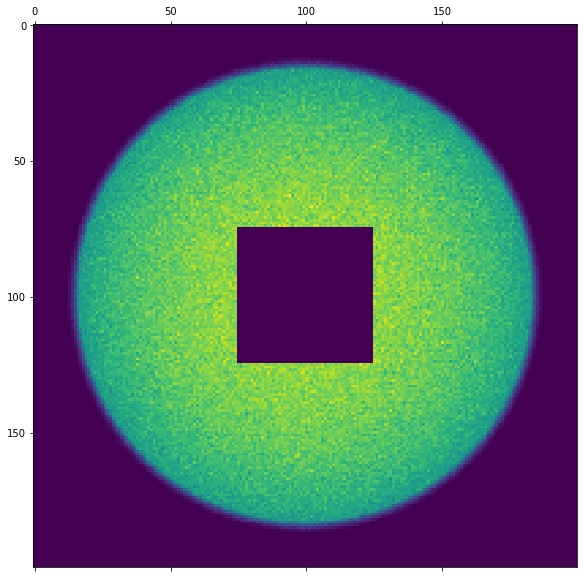

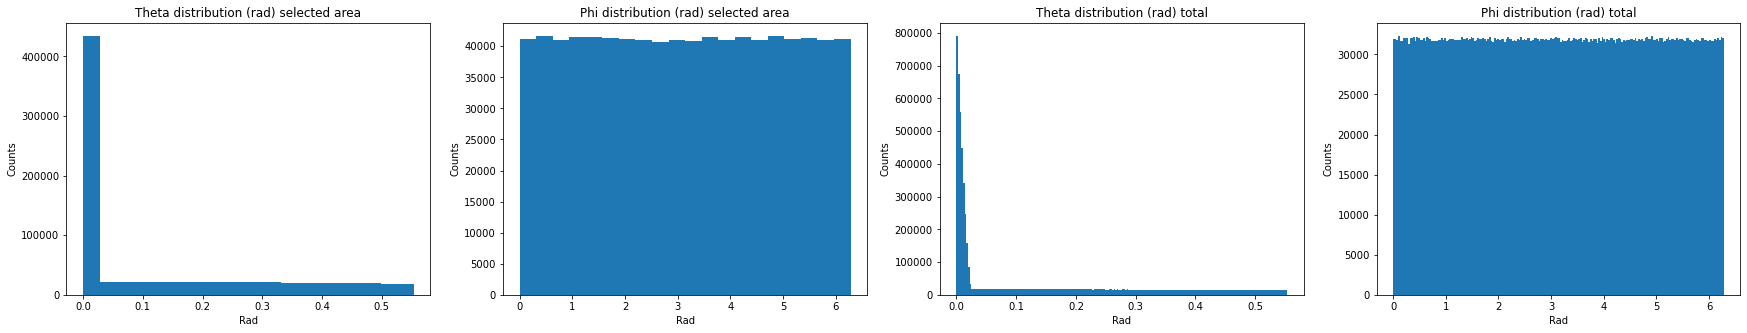

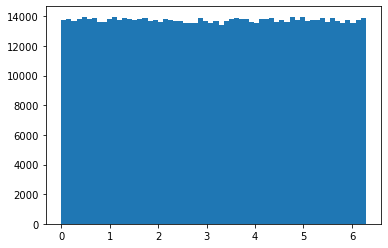

<ipython-input-24-88b86c71863c>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


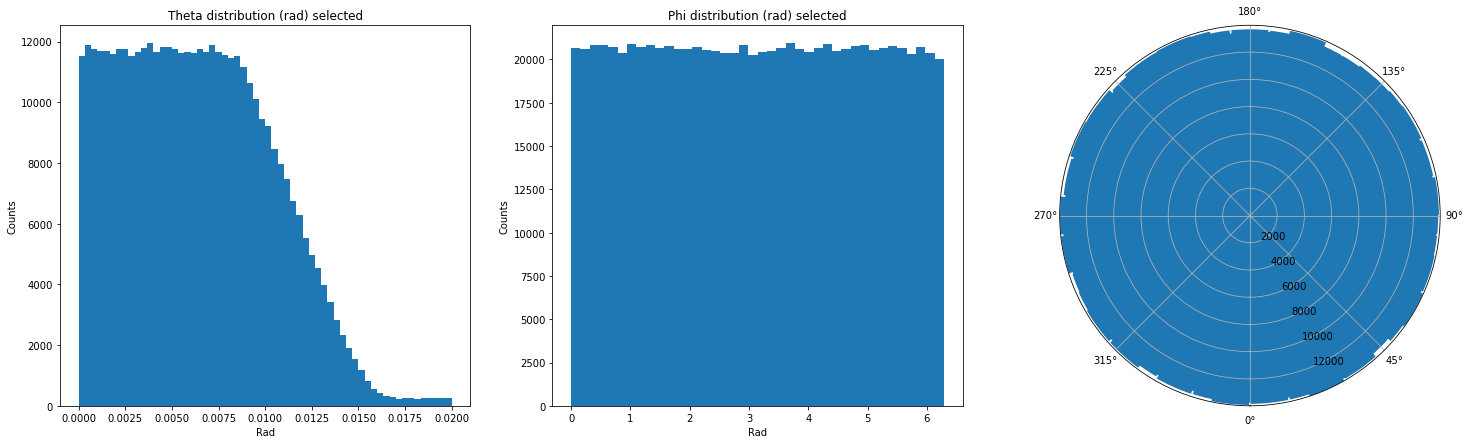

Maximum expected L/D factor:  40.0
Maximum expected angle:  0.02499479361892016
Distribution theta max:  0.5535742172722964
Measured L/D factor:  1.977913864360383
Distribution phi average:  3.140005681915838
Total theta max:  0.5535742172722964
Total measured L/D factor:  1.977913864360383
Total phi average:  3.1405290507324826


In [26]:
IndexX,IndexY = 75,75
bonus = 50
col_D = 50
col_L = col_length
histogram(IndexX,IndexY,PosXX,PosYY,bonus,AnT,AnP,col_D,col_L)
# Scatter True, L=1500mm trans = 60%

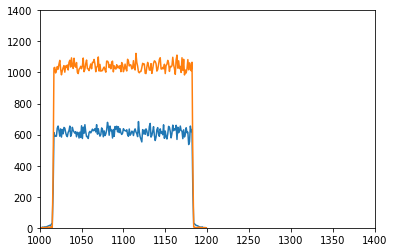

In [33]:
for title1 in ["Sapphire1.txt","Sapphire9.txt"]:
    with open(title1, 'r') as file:
        numbers = np.array(eval(file.read())) # read list string and convert to array
    plt.plot(numbers)
plt.ylim(0,1400)
plt.xlim(1000,1400)
plt.show()
plt.close()


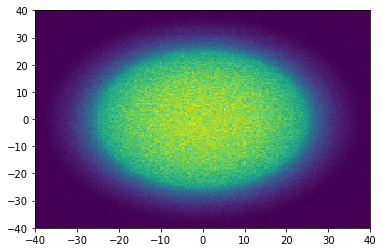

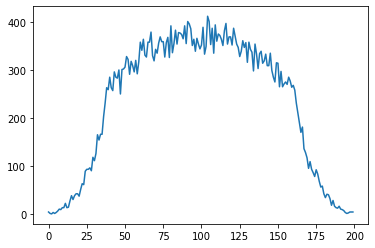

In [38]:
hist,xax,yax,image = plt.hist2d(PosXX,PosYY,bins=200,range=[[-40,40],[-40,40]])
plt.show()
plt.close()
plt.plot(hist[100])
plt.show()
plt.close()

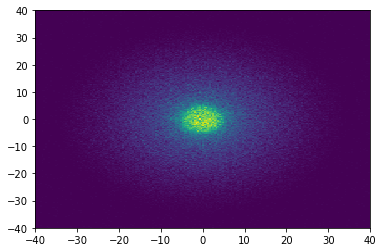

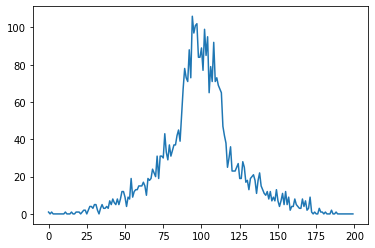

In [40]:
hist,xax,yax,image = plt.hist2d(PosXX,PosYY,bins=200,range=[[-40,40],[-40,40]])
plt.show()
plt.close()
plt.plot(hist[100])
plt.show()
plt.close()

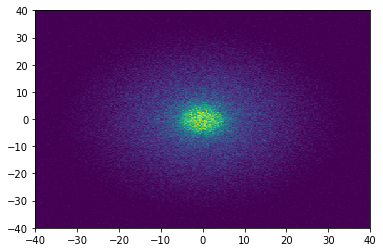

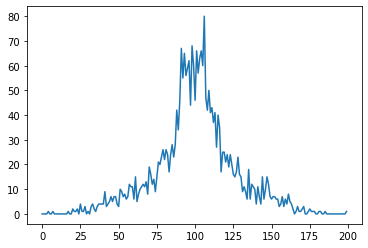

In [43]:
hist,xax,yax,image = plt.hist2d(PosXX,PosYY,bins=200,range=[[-40,40],[-40,40]])
plt.show()
plt.close()
plt.plot(hist[100])
plt.show()
plt.close()

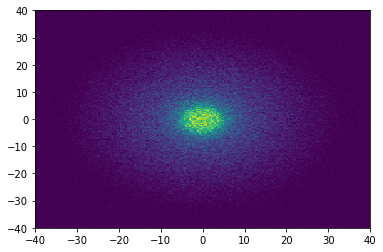

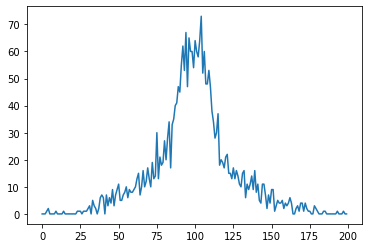

In [45]:
hist,xax,yax,image = plt.hist2d(PosXX,PosYY,bins=200,range=[[-40,40],[-40,40]])
plt.show()
plt.close()
plt.plot(hist[100])
plt.show()
plt.close()

In [ ]:
hist,xax,yax,image = plt.hist2d(PosXX,PosYY,bins=200,range=[[-50,50],[-50,50]])
plt.close()
fig1 = plt.figure(figsize=(14,10))
mat = fig1.add_subplot(111)
tax = mat.matshow(hist)
plt.show()
plt.close()
plt.plot(hist[100])
plt.show()
plt.close()
